In [103]:
import pandas as pd
import numpy as np

In [104]:
X_train = pd.read_csv(r"C:\Users\user\Desktop\daniel\DATA SCIENCE\HENRY\HENRY BOOTCAMP\HACKATON\Hackathon\Housing Dreams\house_train_raw.csv")
X_test = pd.read_csv(r"C:\Users\user\Desktop\daniel\DATA SCIENCE\HENRY\HENRY BOOTCAMP\HACKATON\Hackathon\Housing Dreams\houses_test_raw.csv")


In [105]:
print(X_train.shape,X_test.shape)

(1460, 81) (1459, 80)


In [106]:
X_train.isnull().sum()[X_train.isnull().sum() > 0]
#No hay ningun valor NULO en la columna target "SalePrice", asi que no le hacemos nada mas

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [107]:
columns_to_be_dropped = [col for col in X_train.columns if X_train[col].isnull().sum() > 500]
columns_to_be_dropped

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [108]:
columns_to_be_dropped2 = [col for col in X_test.columns if X_test[col].isnull().sum() > 500]
columns_to_be_dropped2
#Las columnas que seran dropeadas de los dos dataframes coinciden

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [109]:
#Se dropean las columnas con mas valores nulos 
X_test.drop(columns=columns_to_be_dropped2,inplace=True)
X_train.drop(columns=columns_to_be_dropped,inplace=True)

In [110]:
X_train.isnull().sum()[X_train.isnull().sum() > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [111]:
X_test.isnull().sum()[X_test.isnull().sum() > 10]

LotFrontage     227
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageQual       78
GarageCond       78
dtype: int64

In [ ]:
#LotFrontage es la columna que considero es mas necesario imputar valores, ya que tiene una correlacion fuerte con la variable a predecir y ademas es la columna con mas valores nulos.


In [112]:
X_train[~X_train.isnull()].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


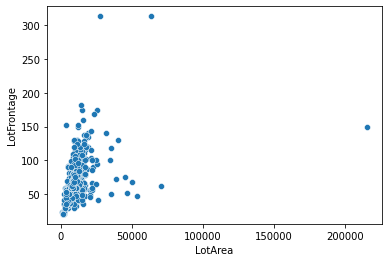

In [113]:
#La variable LotArea es una de las variables que mas correlacion tiene con LotFrontage, asi que hare una grafica para ver su correlacion
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=X_train[~X_train.isnull()],x="LotArea",y="LotFrontage")
plt.show()

<AxesSubplot:xlabel='LotArea'>

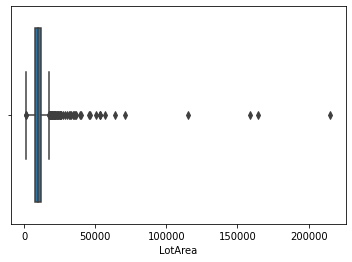

In [114]:
#Exploro LotArea con un boxplot
data=X_train[~X_train.isnull()]
sns.boxplot(data=data,x="LotArea")

In [115]:
#Me quito los outliers de encima de LotArea
q3, q1 = np.percentile(np.array(data.LotArea.values), [75,25])
iqr = q3-q1
h_outliers, l_outliers = q3+1.5*iqr, q1-1.5*iqr

In [118]:
data[(data.LotArea > l_outliers) & (data.LotArea < h_outliers) ].shape

(1391, 76)

<AxesSubplot:xlabel='LotArea'>

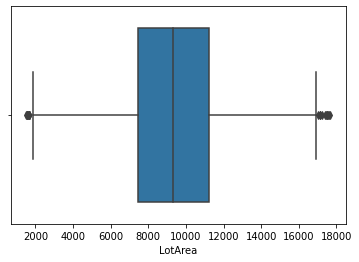

In [120]:
#Una vez retirados los outliers tenemos este bello boxplot
sns.boxplot(data=data[(data.LotArea > l_outliers) & (data.LotArea < h_outliers) ],x="LotArea")

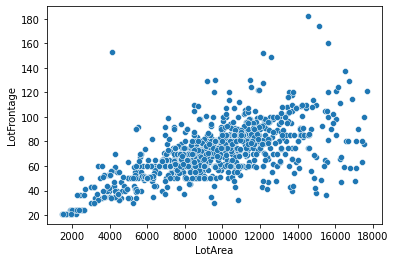

In [121]:
#Construyo un scatterplot para ver la correlacion sin outliers de LotArea
sns.scatterplot(data=data[(data.LotArea > l_outliers) & (data.LotArea < h_outliers)], x="LotArea",y="LotFrontage")
plt.show()

In [123]:
#Creo que LotFrontage tambien tiene outliers por lo tanto me deshare de ellos
q3_, q1_ = np.nanpercentile(np.array(data.LotFrontage.values), [75,25])
iqr_ = q3_-q1_
h_outliers_, l_outliers_ = q3_+1.5*iqr_, q1_-1.5*iqr_

<AxesSubplot:xlabel='LotFrontage'>

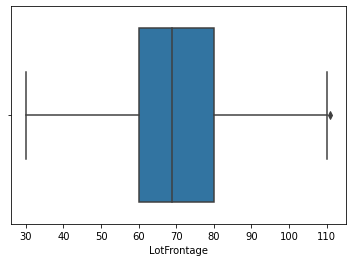

In [126]:
sns.boxplot(data=data[(data.LotFrontage > l_outliers_) & (data.LotFrontage < h_outliers_) ],x="LotFrontage")

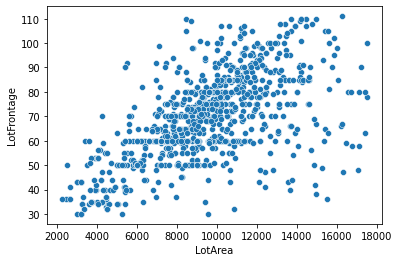

In [127]:
#Ahora el scatterplot entre ambas columnas sin outliers
sns.scatterplot(data=data[(data.LotArea > l_outliers) & (data.LotArea < h_outliers) & (data.LotFrontage > l_outliers_) & (data.LotFrontage < h_outliers_) ], x="LotArea",y="LotFrontage")
plt.show()

In [129]:
#Existe una correlacion de r = 0.60 entree LotArea y LotFrontage sin outliers en ambos casos, asi que obtendre la ecuacion de la recta de esta relacion para imputar los valores de LotFrontage
data_model = data[(data.LotArea > l_outliers) & (data.LotArea < h_outliers) & (data.LotFrontage > l_outliers_) & (data.LotFrontage < h_outliers_) ]

In [130]:
from scipy import stats
model = stats.linregress(data_model.LotArea, data_model.LotFrontage)
beta0 = model.intercept
beta1 = model.slope

In [131]:
#Una vez que tenemos el modelo (LotFrontage = beta0 + beta1*LotArea) calculamos LotFrontage para valores nulos
X_train.loc[X_train["LotFrontage"].isnull(),"LotFrontage"] = X_train.loc[X_train["LotFrontage"].isnull()].LotArea*beta1 + beta0



In [132]:
#Se le hara lo mismo al data_2set de test
data_2 = X_test[~X_test.isnull()]

q3, q1 = np.percentile(np.array(data_2.LotArea.values), [75,25])
iqr = q3-q1
h_outliers, l_outliers = q3+1.5*iqr, q1-1.5*iqr


q3_, q1_ = np.nanpercentile(np.array(data_2.LotFrontage.values), [75,25])
iqr_ = q3_-q1_
h_outliers_, l_outliers_ = q3_+1.5*iqr_, q1_-1.5*iqr_

data_2_model = data_2[(data_2.LotArea > l_outliers) & (data_2.LotArea < h_outliers) & (data_2.LotFrontage > l_outliers_) & (data_2.LotFrontage < h_outliers_) ]

model = stats.linregress(data_2_model.LotArea, data_2_model.LotFrontage)
beta0_ = model.intercept
beta1_ = model.slope

In [133]:
X_test.loc[X_test["LotFrontage"].isnull(),"LotFrontage"] = X_test.loc[X_test["LotFrontage"].isnull()].LotArea*beta1_ + beta0_

In [ ]:
#Aqui dropeamos los valores nulos de las demas columnas pero tengo planeado imputarlos tambien, solo sera para checar el rendimiento del modelo imputando solamente la columna de LotFrontage
X_train.dropna(axis=0,inplace=True)
X_test.dropna(axis=0,inplace=True)
y_train = X_train.pop("SalePrice")
print(X_train.shape,X_test.shape)

In [136]:
#Variables categoricas:
categorical_variables = [col for col in X_train.columns if X_train[col].dtype == "object"]
#Perfecto, tenemos 38 variables a codificar, pero ahora checaremos la cardinalidad de las columnas
baja_cardinalidad_cols = [col for col in categorical_variables if X_train[col].nunique() < 10]
#Almacenaremos las columnas con alta cardinalidad en una lista para dropearlas del dataset
alta_cardinalidad_cols = [col for col in categorical_variables if X_train[col].nunique() > 10]
print(len(categorical_variables),len(baja_cardinalidad_cols),len(alta_cardinalidad_cols))

38 35 3


In [137]:
#Dropeamos las columnas con una alta cardinalidad (tambien se puede hacer encoding pero por ahora las dropeamos)
X_train.drop(alta_cardinalidad_cols,inplace=True,axis=1)
X_test.drop(alta_cardinalidad_cols,inplace=True,axis=1)

In [138]:
#Importamos lo necesario para realizar el One Hot encoder:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown="ignore",sparse=False), baja_cardinalidad_cols)],#Los nuevos valores que se encuentren en las columnas de test, los ignorará
                         remainder='passthrough') #transformamos las columnas categoricas, y las demas cols las pasamos de largo

In [139]:
OH_X_train = pd.DataFrame(ct.fit_transform(X_train), columns=ct.get_feature_names_out())
OH_X_valid = pd.DataFrame(ct.transform(X_test), columns=ct.get_feature_names_out())

OH_X_train.index = X_train.index 
OH_X_valid.index = X_test.index

In [140]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


bosque = RandomForestRegressor(n_estimators=150, random_state=0) #Instanciamos el modelo
bosque.fit(OH_X_train, y_train) #Fiteamos el modelo con nuestra data de train
y_pred = bosque.predict(OH_X_train) #Predecimos para nuestro data test


print(mean_absolute_error(y_train,y_pred))
print(mean_squared_log_error(y_train,y_pred,squared=False))
print(mean_squared_error(y_train,y_pred,squared=False))

6695.574843049328
0.058002698923933824
11634.517887803579
